# Plotting activity on the brain
This is a quick demo of a function to plot electrode activity on the brain.

In [2]:
# To make sure moviepy loads
from imageio.plugins import ffmpeg
ffmpeg.download()

# This is because I'm lazy and haven't made a pip package yet...
import sys
sys.path.append('../../')

# Now regular imports
import ecogtools as et
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne
%matplotlib inline

In [3]:
import imageio
imageio.__version__

'2.4.1'

In [4]:
melec = pd.read_csv('../data/2d_brain/meta_elec.csv')
im = plt.imread('../data/2d_brain/brain.png')
x, y = melec[['x_2d', 'y_2d']].values.T

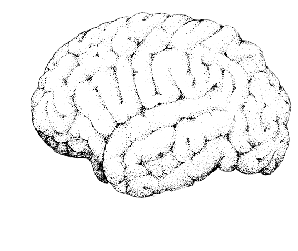

In [5]:
fig, ax = plt.subplots()
ax.imshow(im)
ax.set_axis_off()

**First simulate some activity**

In [6]:
sfreq_activity = 100
duration = 5
activity = np.random.randn(melec.shape[0], sfreq_activity * duration)
time = np.arange(activity.shape[-1]) / float(sfreq_activity)

# Add a random burst of activity
ixs_activity = np.array([sfreq_activity * 2.5, sfreq_activity * 1.], dtype=int)
dur_activity = .5
for ix in ixs_activity:
    activity[:, ix:ix + int(dur_activity * sfreq_activity)] = 3
activity = mne.filter.filter_data(activity, sfreq_activity, None, 5)

Low-pass filtering at 5 Hz
h_trans_bandwidth chosen to be 2.0 Hz
Filter length of 330 samples (3.300 sec) selected


(32, 500)


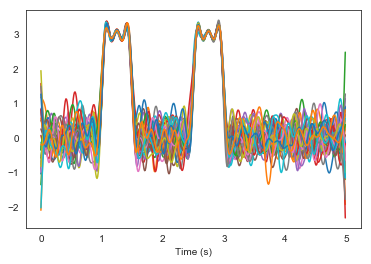

In [7]:
# Activity is of shape (n_channels, n_times)
print(activity.shape)

# Here's what the activity looks like over time
fig, ax = plt.subplots()
_ = ax.plot(time, activity.T)
_ = ax.set(xlabel='Time (s)')

**We can display a single frame of activity like this**

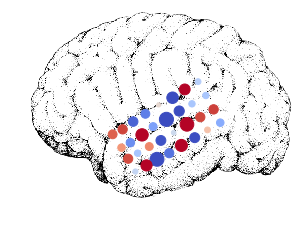

In [8]:
et.plot_activity_on_brain(x, y, activity[:, 0], im,
                          smin=10, smax=100, vmin=-1, vmax=1)

**Alternatively, we can create a movie if we pass a 2-D array as `activity`**

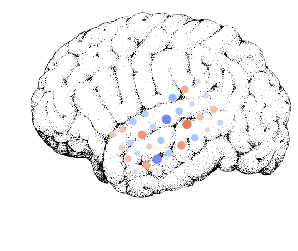

In [9]:
clip = et.plot_activity_on_brain(x, y, activity, im,
                                 smax=100, vmin=-3, vmax=3)
# This is now a moviepy video clip
clip

In [10]:
clip.ipython_display()

100%|█████████▉| 500/501 [00:02<00:00, 172.72it/s]
